In [1]:
import os
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir('..')
os.getcwd()

'/home/admin-gpu/Downloads/action_recognition/action_recognition'

# Train (исходный)

In [3]:
dataset_path = "data/raw/kinetics_700_2020/train.csv"
df = pd.read_csv(dataset_path, sep=",", index_col=False)
df = df[df.label.str.contains('dancing')]

In [4]:
df["duration"] = df["time_end"] - df["time_start"]

In [5]:
df["duration"].describe()

count    13404.000000
mean         9.999627
std          0.031141
min          7.000000
25%         10.000000
50%         10.000000
75%         10.000000
max         10.000000
Name: duration, dtype: float64

<Axes: ylabel='Density'>

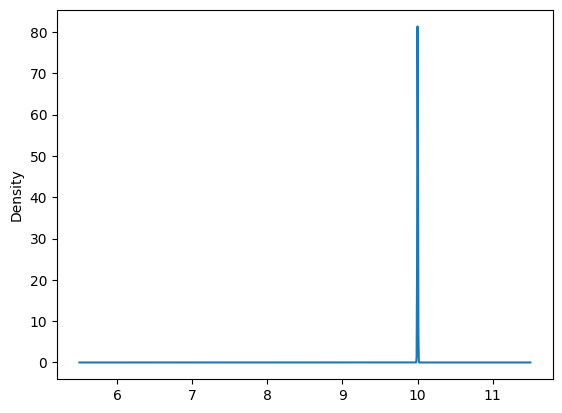

In [6]:
df["duration"].plot(kind="kde")

In [7]:
df[df['duration'] < 10]

label   youtube_id  time_start  time_end  split  duration
460764  swing dancing  jCUJIRjRXeo           0         7  train         7
461128  swing dancing  QPcb5Nhb2Wc           0         8  train         8

В исходной подвыборке `train` датасета `Kinetics 700-2020` с классами содержащими слово `dancing` есть только 2 видео, короче 10 секунд.

In [8]:
class_labels = df["label"].unique().tolist()

for label in class_labels:
    print(label)
    
print(len(class_labels))

belly dancing
breakdancing
country line dancing
dancing ballet
dancing charleston
dancing gangnam style
dancing macarena
jumpstyle dancing
mosh pit dancing
robot dancing
salsa dancing
square dancing
swing dancing
tango dancing
tap dancing
15


/tmp/ipykernel_4035921/142601126.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=pd.DataFrame(df["label"]), palette='hls', ax=ax)
/tmp/ipykernel_4035921/142601126.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(class_labels)


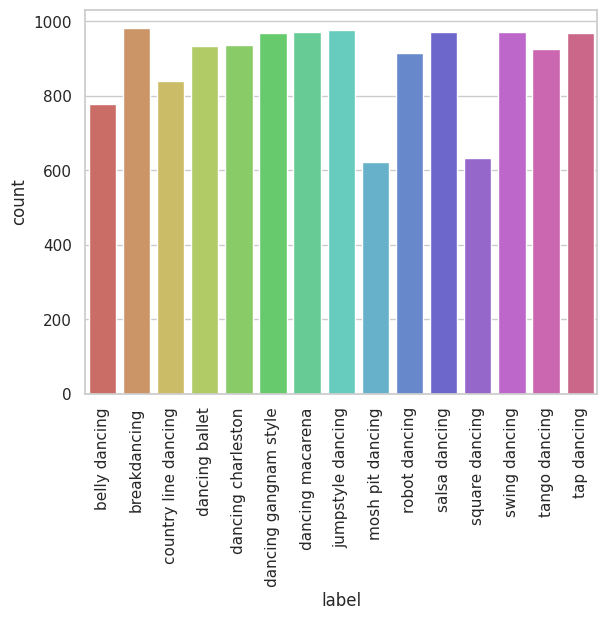

In [9]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
sns.countplot(x='label', data=pd.DataFrame(df["label"]), palette='hls', ax=ax)
ax.set_xticklabels(class_labels)
plt.xticks(rotation=90)
plt.show()

**Итого:** Мы решили взять по 200 видео на каждый класс из `train`-выборки

# Val (исходный)

In [11]:
dataset_path = "data/raw/kinetics_700_2020/val.csv"
df = pd.read_csv(dataset_path, sep=",", index_col=False)
df = df[df.label.str.contains('dancing')]

In [12]:
df["duration"] = df["time_end"] - df["time_start"]

In [13]:
df["duration"].describe()

count    739.0
mean      10.0
std        0.0
min       10.0
25%       10.0
50%       10.0
75%       10.0
max       10.0
Name: duration, dtype: float64

<Axes: ylabel='Density'>

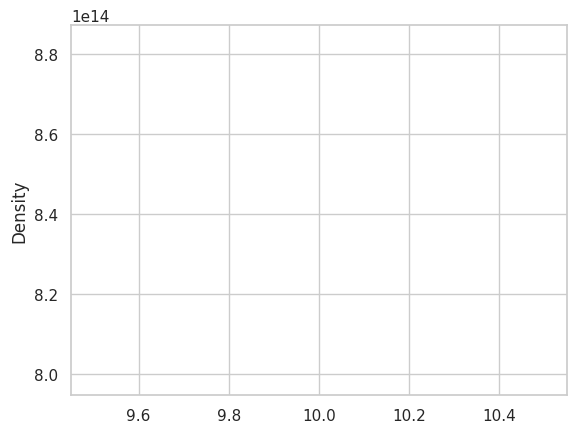

In [14]:
df["duration"].plot(kind="kde")

In [15]:
df[df['duration'] < 10]

Empty DataFrame
Columns: [label, youtube_id, time_start, time_end, split, duration]
Index: []

In [16]:
df[df['duration'] > 10]

Empty DataFrame
Columns: [label, youtube_id, time_start, time_end, split, duration]
Index: []

В исходной `val` подвыборке датасета `Kinetics 700-2020` с классами содержащими слово `dancing` все видео по 10 секунд.

In [17]:
class_labels = df["label"].unique().tolist()

for label in class_labels:
    print(label)
    
print(len(class_labels))

belly dancing
breakdancing
country line dancing
dancing ballet
dancing charleston
dancing gangnam style
dancing macarena
jumpstyle dancing
mosh pit dancing
robot dancing
salsa dancing
square dancing
swing dancing
tango dancing
tap dancing
15


/tmp/ipykernel_4035921/142601126.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=pd.DataFrame(df["label"]), palette='hls', ax=ax)
/tmp/ipykernel_4035921/142601126.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(class_labels)


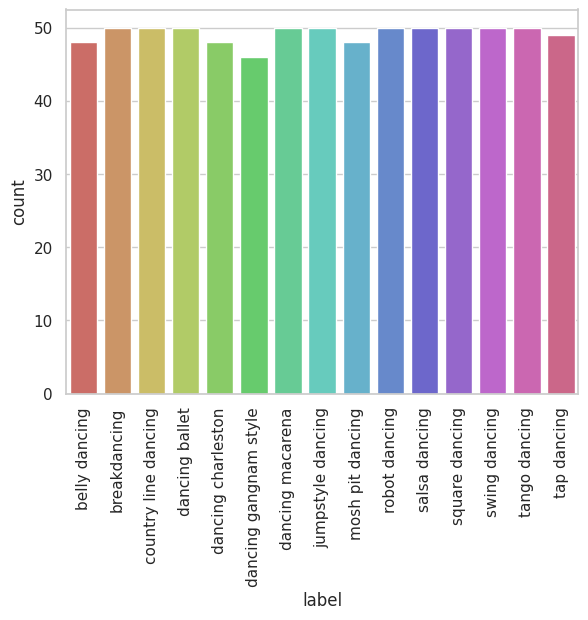

In [18]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
sns.countplot(x='label', data=pd.DataFrame(df["label"]), palette='hls', ax=ax)
ax.set_xticklabels(class_labels)
plt.xticks(rotation=90)
plt.show()

**Итого:** Мы решили взять все 50 видео на каждый класс из `val`-выборки